<a href="https://colab.research.google.com/github/yeymix/bootcampIA/blob/main/TitanicTerminado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error # Librería para calcular el MSE
from sklearn.metrics import mean_absolute_error # Librería para calcular el MAE
from sklearn.tree import DecisionTreeClassifier, plot_tree # Trabajo con árboles y visualización

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
# file_path = 'My Drive/MachineLearning/Titanic-Dataset.csv'
#file_path = 'Mi unidad/MachineLearning/Titanic-Dataset.csv'
#df = pd.read_csv(file_path)
df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# df.dropna()
df['Age'] = df['Age'].mean()
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna('Unknown')
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Se convierten a numéricas las categorías string
df_encoded = pd.get_dummies(df, columns=['Sex', 'Cabin'], drop_first=True)
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",29.699118,1,0,A/5 21171,7.2500,S,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",29.699118,1,0,PC 17599,71.2833,C,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",29.699118,0,0,STON/O2. 3101282,7.9250,S,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",29.699118,1,0,113803,53.1000,S,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",29.699118,0,0,373450,8.0500,S,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Se eliminan del dataset las categorías que no se tendrán en cuenta para el modelo
X = df_encoded.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Embarked'], axis=1)
y = df_encoded['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,3,29.699118,1,0,7.2500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,29.699118,1,0,71.2833,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,29.699118,0,0,7.9250,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,29.699118,1,0,53.1000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,29.699118,0,0,8.0500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Divide los datos en un conjunto de entrenamiento y otro de prueba (80%/20% o 70%/30%) usando train_test_split de scikit-learn .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Fase 3: Implementación Básica del Árbol de Decisión**

Instrucciones:
1. Entrenar el modelo:
Usa DecisionTreeClassifier o DecisionTreeRegressor de scikit-learn para
entrenar el árbol de decisión con los datos de entrenamiento.

In [ ]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
709,3,29.699118,1,1,15.2458,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
439,2,29.699118,0,0,10.5000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
840,3,29.699118,0,0,7.9250,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
720,2,29.699118,0,1,33.0000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
39,3,29.699118,1,0,11.2417,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,3,29.699118,0,0,8.6625,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
633,1,29.699118,0,0,0.0000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
456,1,29.699118,0,0,26.5500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
500,3,29.699118,0,0,8.6625,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Realiza predicciones sobre los datos de prueba
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

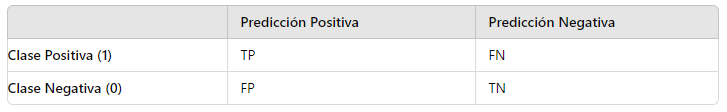

In [ ]:
# Evalúa el rendimiento del modelo:
# Para clasificación, utiliza métricas como precision y matriz de confusión.

accuracy = accuracy_score(y_test, y_pred) # Proporción de predicciones correctas
precision = precision_score(y_test, y_pred, pos_label=1) # mide la proporción de verdaderos positivos (TP) entre todos los casos que el modelo ha predicho como positivos (TP + FP).
recall = recall_score(y_test, y_pred, pos_label=1) # La sensibilidad o recall (también conocida como tasa de verdaderos positivos) mide la proporción de verdaderos positivos (TP) entre todos los casos que en realidad son positivos (TP + FN). Indica cuán bien el modelo es capaz de identificar los verdaderos positivos.

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label=1)

In [ ]:
print(f'Precisión (Accuracy): {accuracy:.2f}')
print(f'Precisión (Precision): {precision:.2f}')
print(f'Sensibilidad (Recall): {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precisión (Accuracy): 0.78
Precisión (Precision): 0.84
Sensibilidad (Recall): 0.59
F1-Score: 0.69


Métricas sin la columna de Tarifa:

Precisión (Accuracy): 0.81
Precisión (Precision): 0.82
Sensibilidad (Recall): 0.69
F1-Score: 0.75


Predicción con profundidad 5, proporción de pruebas 80/20

Precisión (Accuracy): 0.80

Precisión (Precision): 0.82

Sensibilidad (Recall): 0.68

F1-Score: 0.74

Con produndidad de 3, proporción de pruebas 80/20:

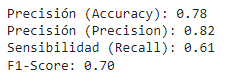

In [ ]:
print('Matriz de Confusión:')
print(cm)

Matriz de Confusión:
[[144  13]
 [ 45  66]]


Matriz de Confusión sin columna Tarifa, arbol profundidad 6:

[[140  17]

 [ 34  77]]

Con profundidad de 3:

[[95 29

10 45]]

Error cuadrático medio: 0.22
Error absoluto medio: 0.22

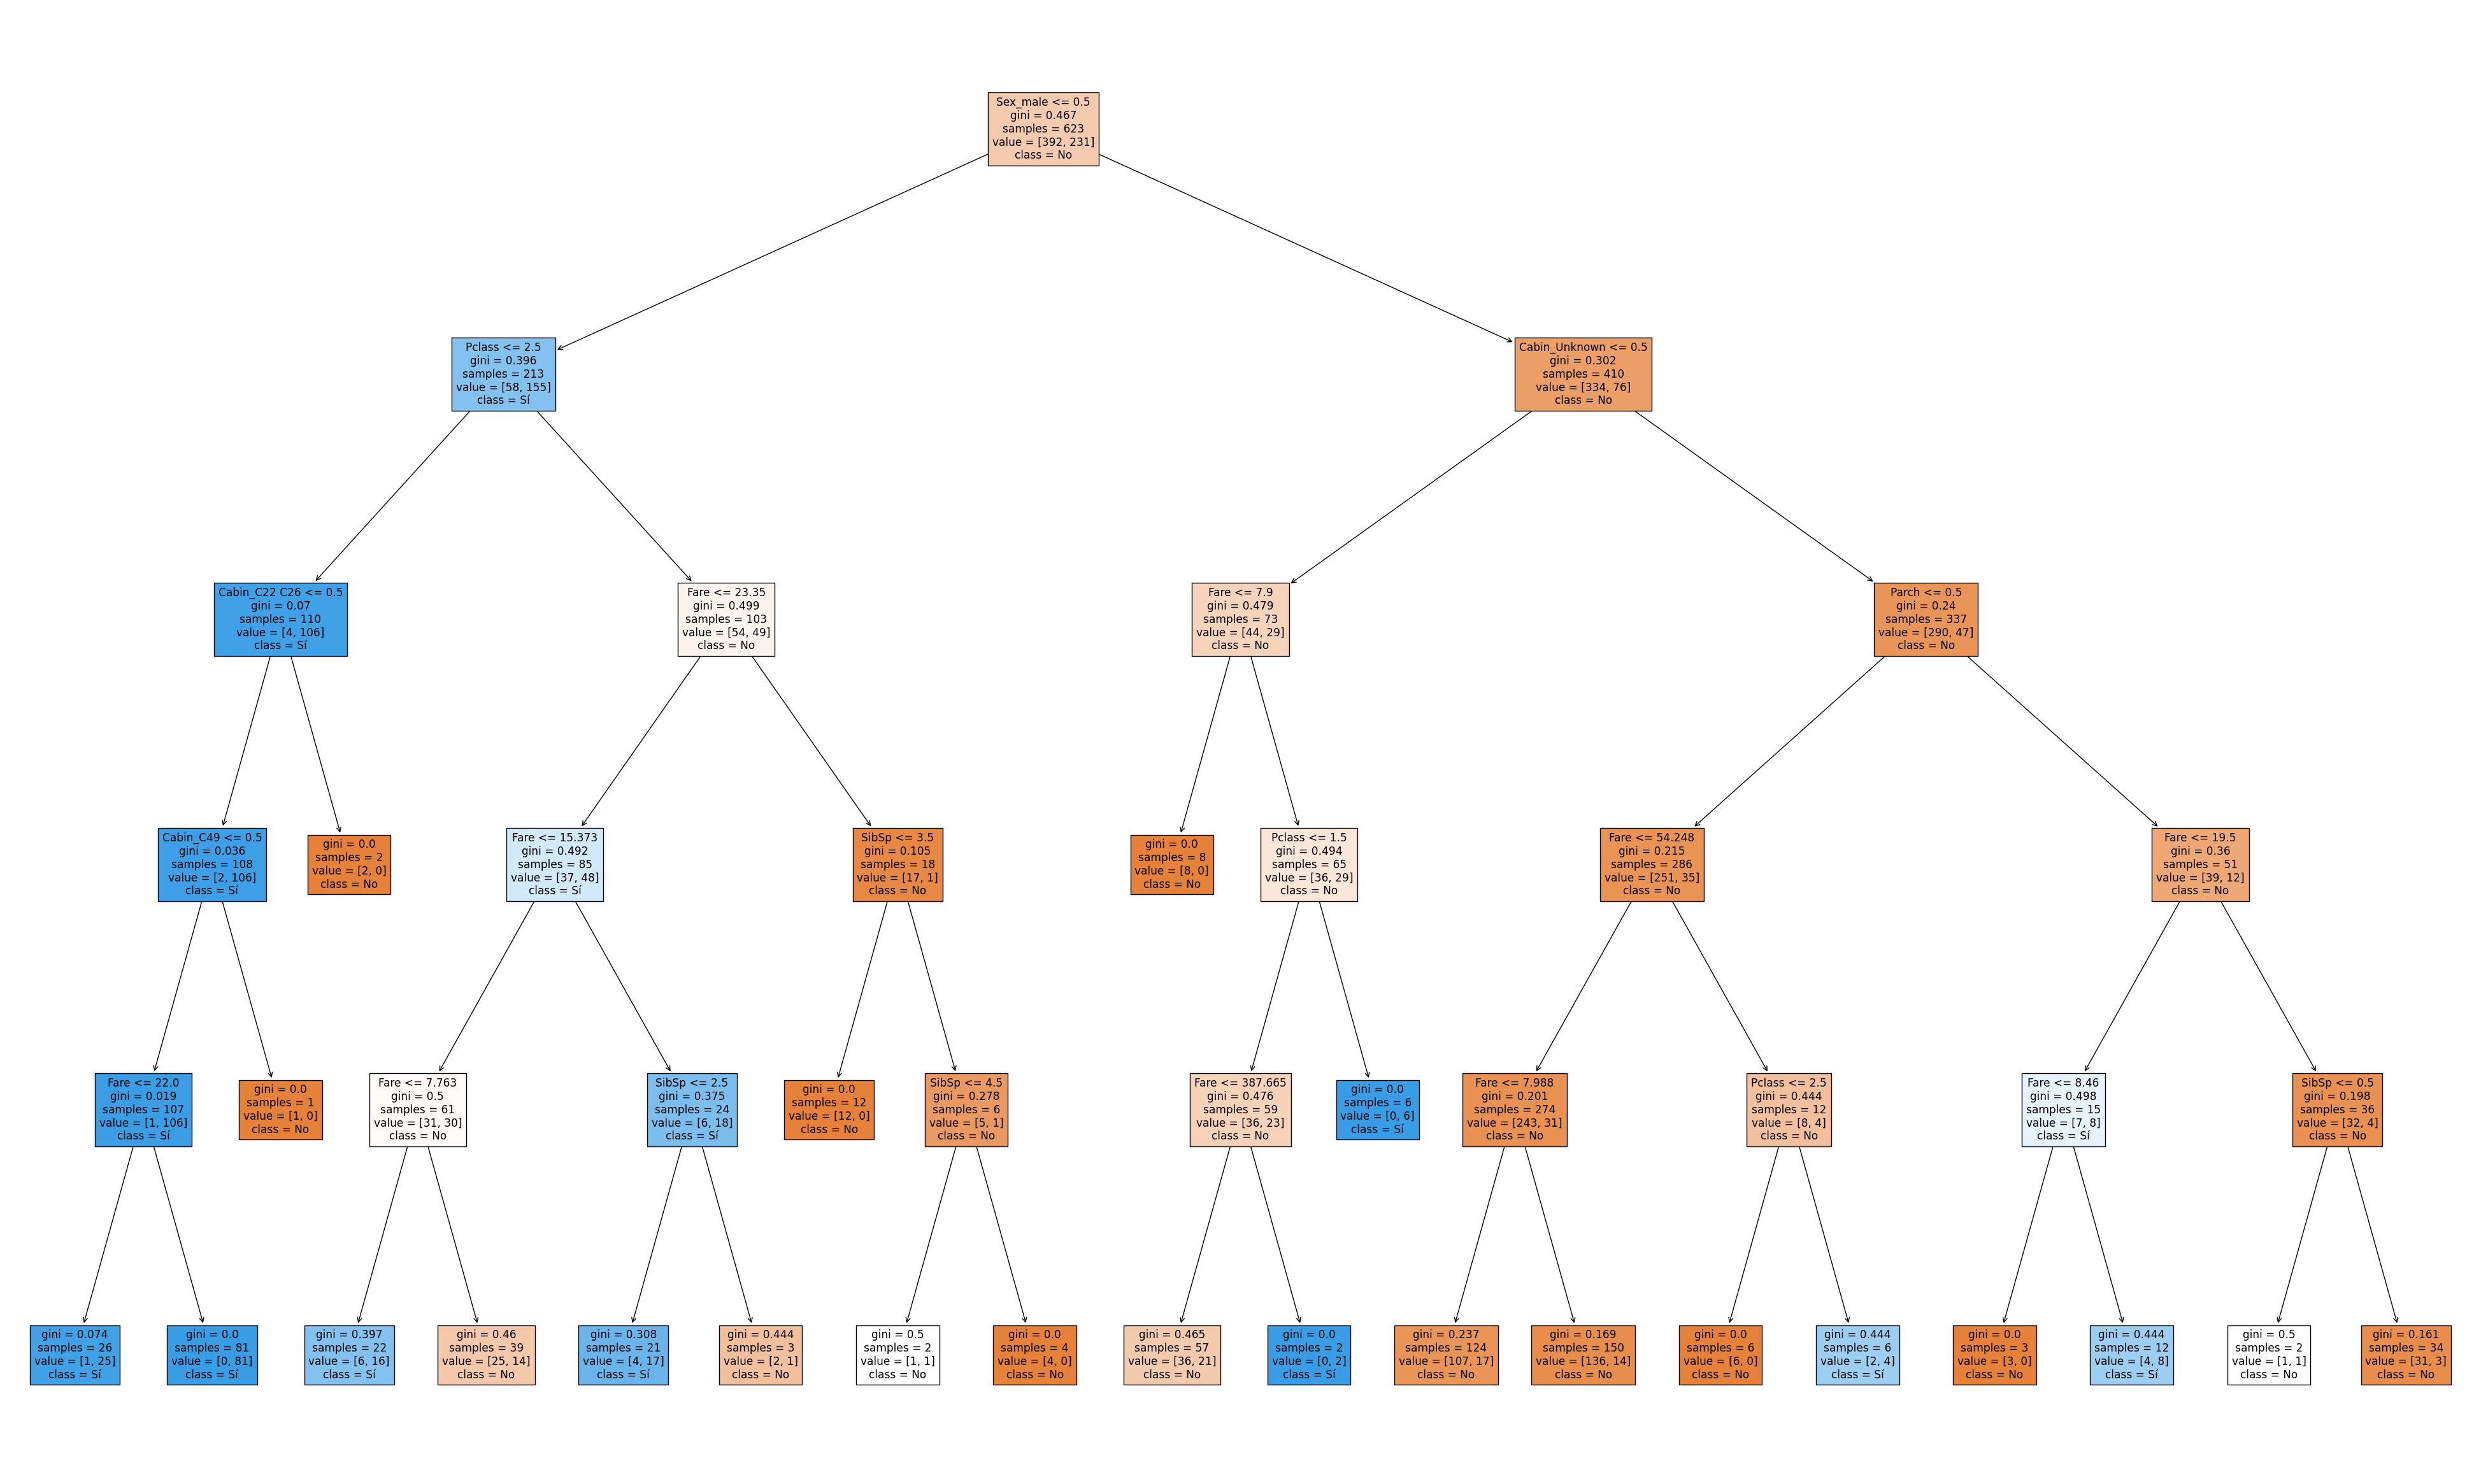

In [ ]:
plt.figure(figsize=(50,30))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Sí'], filled=True)
plt.show()

In [ ]:
# Dataframe con resultados con árbol de decisión
results_arbol_df = pd.DataFrame({
    'True Labels': y_test,
    'Predicted Labels': y_pred
})

results_arbol_df

,True Labels,Predicted Labels
709,1,1
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


# Modelo KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print("Matriz de Confusión con KNN \n", cm_knn)
print("Matriz de Confusión con Árbol de decisión: \n",cm)

Matriz de Confusión:
Matriz de Confusión con KNN 
 [[134  23]
 [ 40  71]]
Matriz de Confusión con Árbol de decisión: 
 [[144  13]
 [ 45  66]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")

Precisión (Accuracy): 0.76


In [ ]:
# Dataframe con resultados KNN
results_df = pd.DataFrame({
    'True Labels': y_test,
    'Predicted Labels': y_pred
})

results_df

,True Labels,Predicted Labels
709,1,1
439,0,0
840,0,0
720,1,0
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0
